**Autor:** *@lexbonell@*

**Caso:** *Computrabajo-Antoquia*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
import re
%matplotlib inline 

In [2]:
df=pd.read_csv('Vacantes_Antioquia.csv')
df=pd.DataFrame(df)

In [3]:
df=df.drop(columns='Unnamed: 0')

# Top 15 de las empresas con  mas vacantes 

In [4]:
df['Empresa'].value_counts().head(15)

 Jiro S.A.                                    593
 nexarte servicios temporales s.a             482
 MANPOWER PROFESSIONAL LTDA                   471
 Mision Empresarial S.A                       350
 ACTIVOS S A S                                341
 Grupo Accion Plus                            320
 Staffing de Colombia                         288
 COMPLEMENTOS HUMANOS                         287
 Tiempos SAS                                  259
 OneLink BPO                                  249
 Saitemp S.A                                  232
 Dar Ayuda Temporal                           226
 Eficacia                                     225
 MISION TEMPORAL                              212
 ORGANIZACIÓN SERVICIOS Y ASESORIAS S.A.S.    184
Name: Empresa, dtype: int64

In [5]:
df.head()

,Fecha,Titulo,Desripcion,Empresa
0,"Hoy, 11:06 a. m.",Empleo de Convocatoria laboral técnico en inst...,"Si eres bachiller, técnico o tecnologo con exp...",HQ5 S.A.S
1,"Hoy, 11:01 a. m.",Empleo de Coordinador Comercial Apartado,Empresa de telecomunicaciones requiere Coordin...,SU TEMPORAL S.A
2,"Hoy, 11:01 a. m.",Empleo de Mensajero - Motorizado,Reconocida compañía Importadora requiere Mensa...,NaN
3,"Hoy, 10:56 a. m.","Empleo de Asesor de Repuestos, Filtros y Lubri...",Se necesita persona con PERFIL COMERCIAL y exp...,TECNODIESEL S.A.S
4,"Hoy, 10:53 a. m.",Empleo de conductor con licencia c2 o c3 urgen...,importante empresa de consumo masivo requiere ...,PROCESOS TERCERIZADOS S.A.S


 # Analisis del texto "Titulo de la vacante "
 
 Vamos a crear el dataset que vamos a tokenizar para investigar ¿Cuales son los trabajos mas frecuentes de acuerdo al titulo de la vacante ?

In [6]:
df['Titulo'].count()

14260

In [7]:
texto=''
for i in range(14260):
    texto= texto + ' ' +df['Titulo'][i]

In [8]:
len(texto) # 820104 palabras

820104

# Eliminamos "Stopwords"

In [9]:
stopWords = set(stopwords.words('spanish')) # eliminar palabras irrelevantes
words = word_tokenize(texto)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

In [10]:
diccio=nltk.Counter(wordsFiltered)
hola=dict(diccio) # Convertimos nuestra respuesta en un diccionario

In [11]:
valores=hola.values()
filas=hola.keys()
filas=list(filas) # Converción a lista  
valores=list(valores) # Conversión a lista 

In [12]:
# Creamos un  DataFrame con las palabras comunes

df_pal = pd.DataFrame([[key, hola[key]] for key in hola.keys()], columns=['Word','Frequency_words'])

In [13]:
df_pal.sort_values(by='Frequency_words',ascending=False).head(10)

,Word,Frequency_words
0,Empleo,14260
10,-,9736
40,experiencia,1891
33,Auxiliar,1631
12,Asesor,1248
25,comercial,963
192,Medellin,801
14,",",723
31,Con,711
7,Comercial,671


# Eliminamos palabras obvias de busqueda de empleo como:

* Empleo
* Convocatoria
* -,1,6
* Con
* experiencia
* año , años 
* requiere, entre muchas otras....

In [14]:
df_pal=df_pal[(df_pal['Word'] != 'Empleo') & (df_pal['Word'] != ',') & (df_pal['Word'] != '1') & (df_pal['Word'] != '6') & (df_pal['Word'] != 'Con') & (df_pal['Word'] != 'experiencia') & (df_pal['Word'] != 'Medellin') & (df_pal['Word'] != "año") & (df_pal['Word'] != 'años') & (df_pal['Word'] != 'Rionegro') & (df_pal['Word'] != 'requiere') & (df_pal['Word'] != '-') & (df_pal['Word'] != 'Medellín') & (df_pal['Word'] != 'meses') & (df_pal['Word'] != '(') & (df_pal['Word'] != ')') & (df_pal['Word'] != 'Se') & (df_pal['Word'] != '/') & (df_pal['Word'] != '.')  & (df_pal['Word'] != 'Antioquia')  & (df_pal['Word'] != 'Urgente')  & (df_pal['Word'] != 'De')  & (df_pal['Word'] != 'C2')  & (df_pal['Word'] != '2')  & (df_pal['Word'] != 'Para')  & (df_pal['Word'] != 'En')  & (df_pal['Word'] != 'licencia')  & (df_pal['Word'] != '3')  & (df_pal['Word'] != 'empresa')  & (df_pal['Word'] != 'Experiencia')]

# Agrupamientos cargos repetidos

In [15]:
df_pal.loc[df_pal['Word'] == 'auxiliar' , 'Word']='Auxiliar'
df_pal.loc[df_pal['Word'] == 'comercial' , 'Word']='Comercial'

In [16]:
test=df_pal.groupby(by='Word').sum().sort_values(by='Frequency_words',ascending=False).head(20)
df_top_20=test.reset_index(inplace=False)
df_top_20

,Word,Frequency_words
0,Auxiliar,1962
1,Comercial,1634
2,Asesor,1248
3,Técnico,553
4,Analista,505
5,ventas,452
6,Conductor,437
7,Operario,436
8,moto,435
9,Ejecutivo,424


# Visualización cargos mas frecuentes 

Cargos mas frecuentes en función del **`titulo de la vacante`**

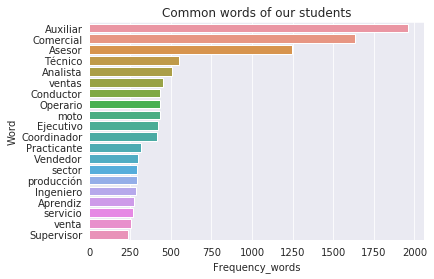

In [17]:
sns.set_style(style='darkgrid')
top_20_Qword=df_top_20
plt.title('Common words of our students')
sns.barplot(data=top_20_Qword,x='Frequency_words',y='Word')

# FINAL......